In [3]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

In [4]:
# Path para importacion de funciones
dir_actual    = os.path.abspath('')
dir_parent = os.path.dirname(dir_actual)
if not dir_parent in sys.path: sys.path.append(dir_parent)

## Load Simulation Stats

In [5]:
from functions import load_obj, save_obj

ciclos = load_obj('numero_de_ciclos_Weeds90')
print('Total de ciclos utilizados:',ciclos)
stats_IOBuffer_1 = load_obj('stats_B1_Weeds90')
stats_IOBuffer_2 = load_obj('stats_B2_Weeds90')

Total de ciclos utilizados: 207761940


## Plotting

In [13]:
def plot_buffer(stats, ciclos, title, N_buffer, exp, low=0, high=290400, mode = 'Duty', figsize = (15,15), word_size=12,
                save_fig = False):
    rows = high - low
    if mode == 'Duty':
        mx = 0.5
        mn = 0
    elif mode == 'Switch':
        data = stats['cambios_logicos']
        mx = np.max(data)
        mn = 0
    data = stats['ciclos_1']/ciclos
    data[data > 0.5] = 1 - data[data > 0.5]
    data = np.reshape(data[low*word_size:high*word_size],(rows,word_size))
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize= figsize, gridspec_kw={'width_ratios': [1, 5, 6]})
    fig.suptitle(title, fontsize=20)

    ax1.set_title('Sign bit')
    im1 = ax1.imshow(data[...,0:1], aspect='auto',cmap='YlOrRd',extent=[0,1,high,low],vmin=mn, vmax=mx)
    ax1.set_xticks([0,1])

    ax2.set_title('Int bits')
    im2 = ax2.imshow(data[...,1:6], aspect='auto',cmap='YlOrRd',extent=[1,6,high,low],vmin=mn, vmax=mx)
    ax2.yaxis.set_visible(False)

    ax3.set_title('Frac bits')
    im3 = ax3.imshow(data[...,6:12], aspect='auto',cmap='YlOrRd',extent=[6,12,high,low],vmin=mn, vmax=mx)
    ax3.yaxis.set_visible(False)
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes("right", size="20%", pad=0.05)
    cbar3 = plt.colorbar(im3, cax=cax3, format="%.2f")
    ax3.yaxis.set_visible(False)
    
    if save_fig:
        fig.savefig('Figuras/Heatmaps/Heatmap Buffer '+str(N_buffer) + 'Experimento ' + exp + mode + '.png')

In [14]:
# T3 : Nada es aplicado directamente
# T2 : Funcion de Activacion aplicada directamente
# T1 : Funcion de Activacion y BN son aplicadas directamente

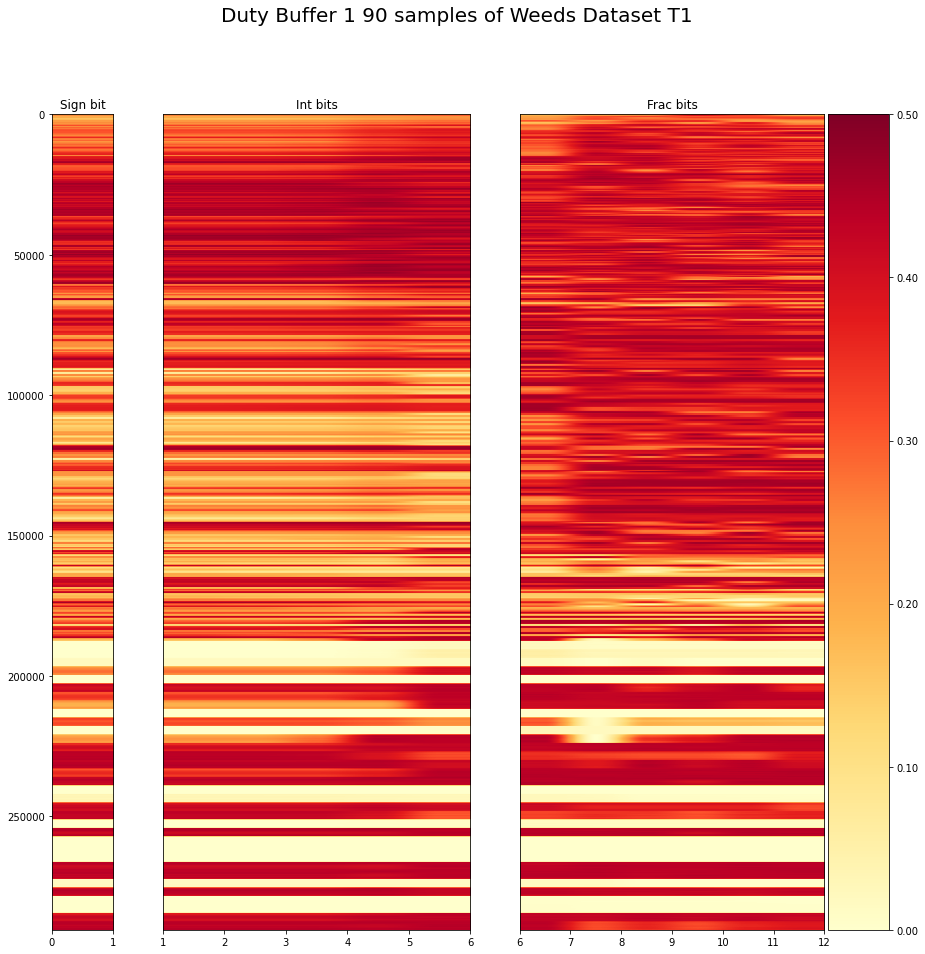

In [15]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Duty Buffer 1 90 samples of Weeds Dataset T1',1,'T1', 0, 290400, 'Duty', (15,15))

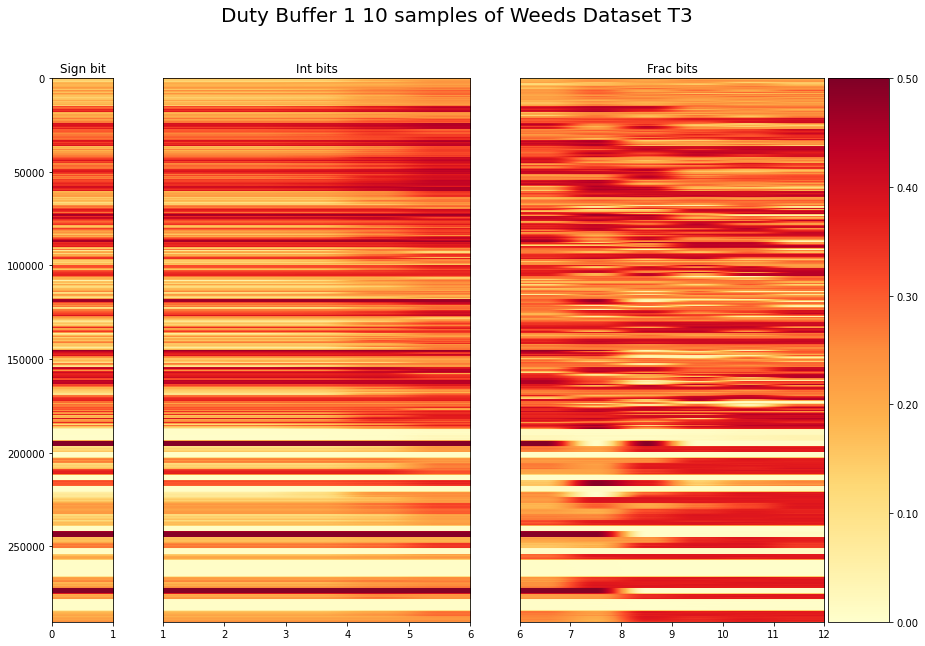

In [7]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Duty Buffer 1 10 samples of Weeds Dataset T3', 0, 290400, 'Duty', (15,10))

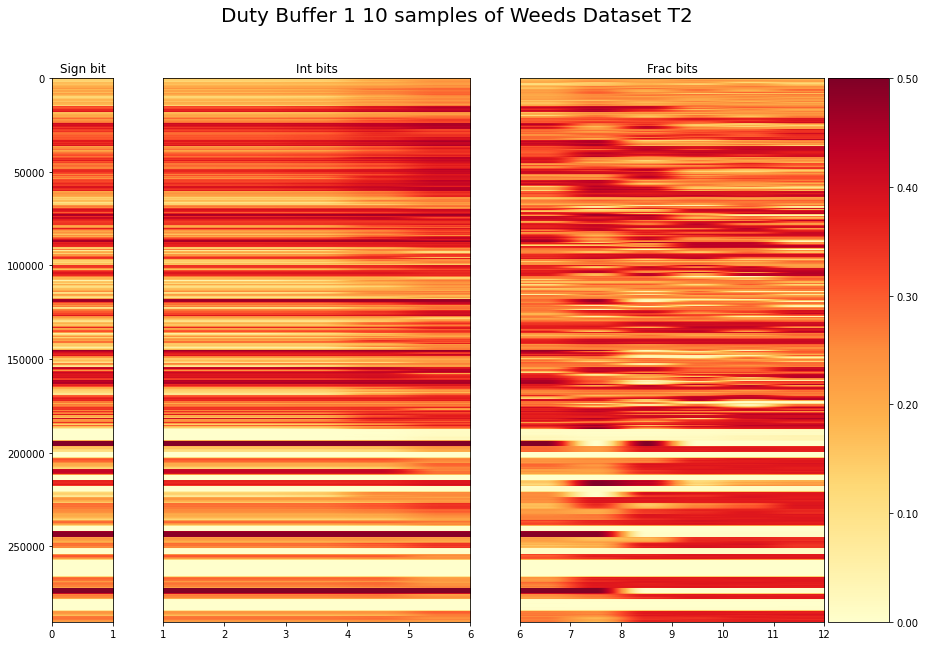

In [9]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Duty Buffer 1 10 samples of Weeds Dataset T2', 0, 290400, 'Duty', (15,10))

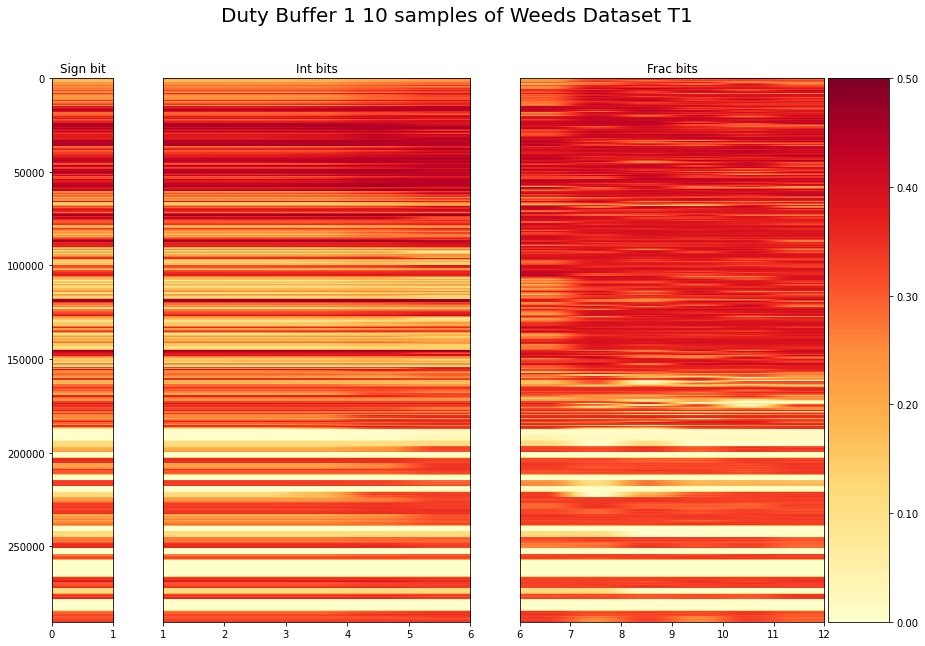

In [11]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Duty Buffer 1 10 samples of Weeds Dataset T1', 0, 290400, 'Duty', (15,10))

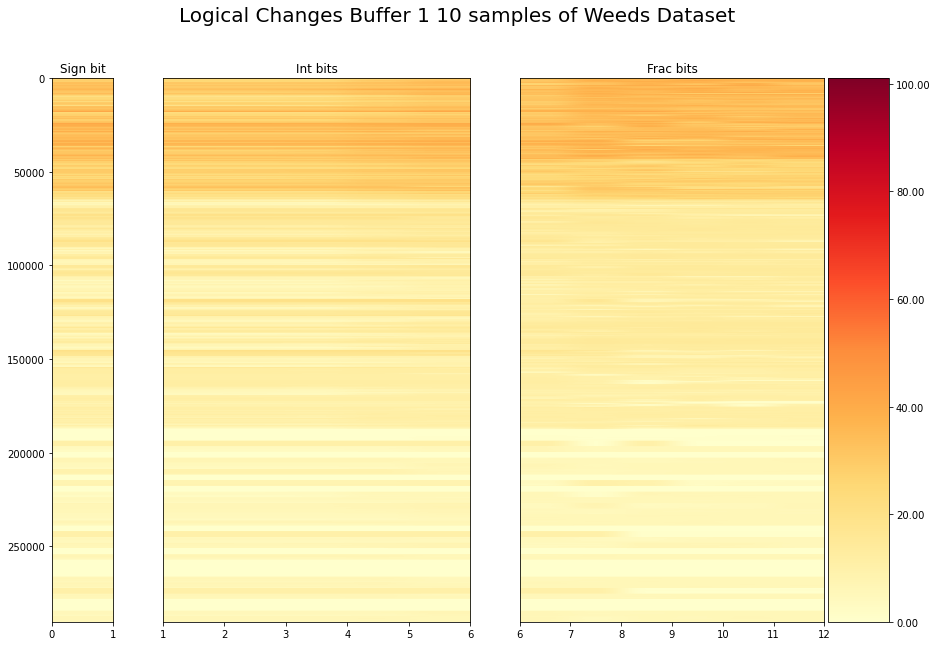

In [30]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Logical Changes Buffer 1 10 samples of Weeds Dataset', 0, 290400, 'Switch', (15,10))

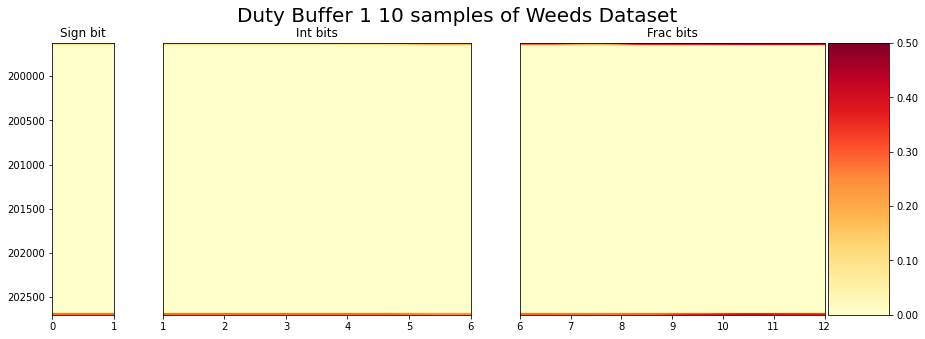

In [32]:
plot_buffer(stats_IOBuffer_1, ciclos, 'Duty Buffer 1 10 samples of Weeds Dataset', 199625, 202700, 'Duty', (15,5))